You can download this whole post as a Jupyter notebook [here](/posts/coin-flipping-and-entropy.ipynb)
# Some useful interactive bits for coin flipping and entropy.

I made this post for my 1st semester intro physics class, as a lead in to the standard discussion of entropy (sue me, I can't make myself dive into this without starting from stat mech).

## Say you're going to flip 4 coins. What's the most likely outcome? How likely is it?

How should we keep track of outcomes? One easy way is to ask "how many heads did we get?"

<!-- TEASER_END -->

Well, intuitively, we'd all say you're most likely to get two heads and two tails. Let's check. If it's a fair coin, we can assume that we're equally likely to get a head or a tail on each flip. So, we flip the first coin, and make a table:

| 1 |
|---|
| H |
| T |

Great. Two outcomes, equally likely. One head 50% of the time, zero heads 50% of the time. What if we flip a second coin (students should work all of this out on their own, but hey, I'm just a blog post). If the first was heads, the second could be either heads or tails. Ditto for the second.

| 1 | 2 | |How many heads? |
|---|---|-|----------------|
| **H** | **H** | |2 |
|  H | **T** | |1 |
| **T** | **H** | |1 |
|  T | **T** | |0 |

This time, it's a bit more interesting. We had three possible outcomes. We got two heads once, one head twice, and zero heads once. So, our most likely outcome is half heads, but not by a huge amount.

If we add a third coin, and then a fourth coin, we get (again, students should work it all out)

| 1     | 2     | 3     | 4     | | How many heads? |
|-------|-------|-------|-------|-|-|
| **H** | **H** | **H** | **H** | | 4|
| H     | H     | H     | **T**     | | 3|
| H     | H     | **T** | **H**     | | 3|
| H     | H     | T     | **T**     | | 2|
| H     | **T**     | **H**     | **H**     | | 3|
| H     | T     | H     | **T**     | | 2|
| H     | T     | **T**     | **H**     | |2 |
| H     | T     | T     | **T**     | | 1|
| **T** | **H** | **H** | **H** | | 3|
| T     | H     | H     | **T**     | | 2|
| T     | H     | **T** | **H**     | | 2|
| T     | H     | T     | **T**     | | 1|
| T     | **T**     | **H**     | **H**     | | 2|
| T     | T     | H     | **T**     | | 1|
| T     | T     | **T**     | **H**     | | 1|
| T     | T     | T     | **T**     | | 0|

And if we tabulate that, we have 16 possible outcomes. We get 4 heads 1/16 of the time, 3 heads 4/16 of the time, 2 heads 6/16 of the time, 1 head 4/16 of the time, and 0 heads 1/16 of the time.

We can visualize that with a histogram.

In [1]:
import numpy as np,itertools, pandas as pd, scipy as sp
import seaborn as sns
from matplotlib import pyplot as plt
from IPython.display import HTML
from ipywidgets import interact, interactive, fixed

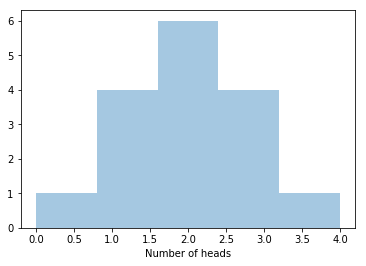

In [2]:
heads = pd.Series(np.array([4,3,3,2,3,2,2,1,3,2,2,1,2,1,1,0]),name='Number of heads')
sns.distplot(heads,kde=False,bins=5);

## Phrasing it with statistical mechanics

The fundamental postulate of statistical mechanics says that each of these different ways of flipping coins (HHHH, HHTH, HHHT, etc.) is equally likely. That makes intuitive sense here: each individual coin flip was equally likely. But, we can use that to figure out probabilities. We actually did that for the "flip three coins" example above. Here, we say that there were 4 heads in 1/16 of the flips, so we have a 1/16 = 6.25% chance of getting one head. Here's the same thing, plotted with probabilities instead of "number of times this happened":

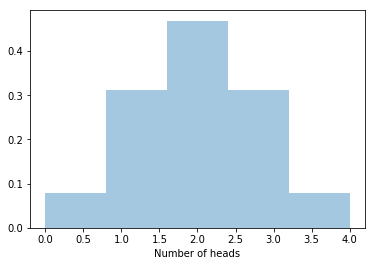

In [3]:
sns.distplot(heads,kde=False,bins=5,norm_hist=True);

So, that's cool. We now know how likely it is that we're going to get any given number of heads. For four coin flips, our intuition was probably right: more likely to get two heads. But not *that much* more likely. 

## Flipping more coins

If we want to flip more coins, it's going to be a pain in the neck to make that table over and over. Luckily, this is bundled up in a math/probability/stats concept called "combinations". Remember how, when we flipped four coins, we had four ways to get one head?

In [4]:
sp.special.comb(4,1)

4.0

And how there were six ways to get two heads?

In [5]:
sp.special.comb(4,2)

6.0

We can get a list of all of those:

In [6]:
[sp.special.comb(4,i) for i in range(5)]

[1.0, 4.0, 6.0, 4.0, 1.0]

And we can wrap that whole thing up into an interactive plot

In [8]:
def plotflips(num_coins=4):
    flips_with_heads = [sp.special.comb(num_coins,i) for i in range(num_coins+1)]
    flips_with_heads = np.array(flips_with_heads)
    #plt.bar(range(num_coins+1),flips_with_heads/flips_with_heads.sum())
    plt.bar(range(num_coins+1),flips_with_heads)
    plt.show()
    
interact(plotflips,num_coins=list(range(1,100)) + list(range(100,200,10)) + list(range(200,1001,100)));

interactive(children=(Dropdown(description='num_coins', index=3, options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 1…

## Back to some physics

How does this all connect to entropy? People usually say that "entropy" means things "want to be more disordered" ... let's use that to think about the air molecules in the room. If air molecules can be randomly located anywhere in a room, why don't you ever have to worry about walking into a room and finding all of them on the other side? If that happened, you'd asphyxiate right away!

Well, in terms of entropy, stuffing them all on one side would certainly be a more ordered state. What can our coins tell us about that? A really simple model would be to say "heads" means a molecule is on the left side of the room, "tails" means it's on the right. Then, flipping 0 heads would mean you asphyxiate. Look at the above interactive plot, and notice that even with 1000 "molecules" the probability of having things spread out evenly is WAY bigger than the alternative. Think about avogadro's number.